In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
px.data.gapminder() #dataset sobre a renda per capita de países

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
df = px.data.gapminder().query('country == "Brazil"').set_index('year') 

#pegar só os dados do Brasil e ordenar pelo ano

In [ ]:
df.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,Brazil,Americas,50.917,56602560,2108.944355,BRA,76
1957,Brazil,Americas,53.285,65551171,2487.365989,BRA,76
1962,Brazil,Americas,55.665,76039390,3336.585802,BRA,76
1967,Brazil,Americas,57.632,88049823,3429.864357,BRA,76
1972,Brazil,Americas,59.504,100840058,4985.711467,BRA,76


Text(0.5, 0, 'Tempo')

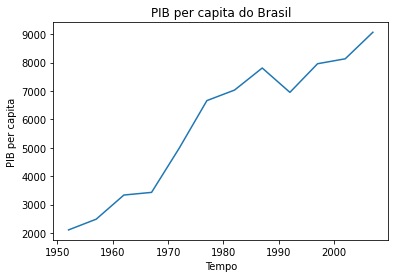

In [ ]:
plt.plot(df.index, df['gdpPercap']) #renda per capita por ano

plt.title('PIB per capita do Brasil') #título do gráfico
plt.ylabel('PIB per capita') #nome para eixo y
plt.xlabel('Tempo') #nome para eixo x

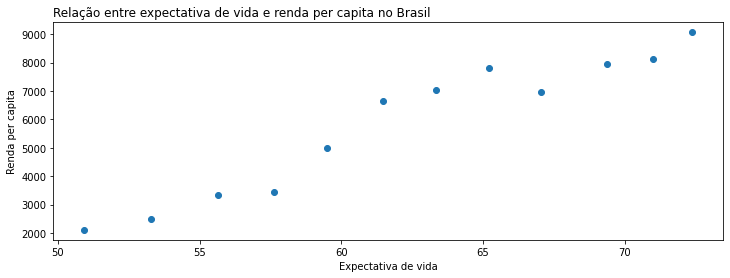

In [ ]:
title = 'Relação entre expectativa de vida e renda per capita no Brasil'

plt.figure(figsize = (12, 4))
plt.scatter(df['lifeExp'], df['gdpPercap'], cmap= 'viridis') #eixo x, eixo y
plt.xlabel('Expectativa de vida')
plt.ylabel('Renda per capita')
plt.title(title, loc = 'left')
plt.show()

Text(0.5, 1.0, 'População Brasileira')

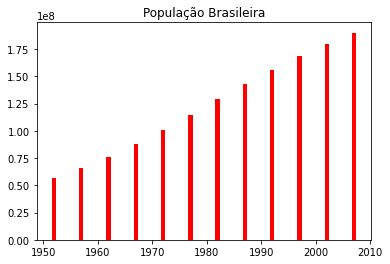

In [ ]:
#gráfico de barras

plt.bar(x = df.index,
        height = df['pop'],
        color = 'red')
#população por ano, x = anos, 'altura' = valor da população 

plt.title('População Brasileira')

Criando funções de filtro

In [ ]:
def filtrar_continente(continente):
  df = px.data.gapminder()
  df = df[df['continent'] == continente] #filtro para o continente passado como parâmetro
  return df

In [ ]:
def filtrar_pais(pais, variavel):
  'Filtra alguma variavel "pop", "gdlPercap" e "lifeExp"'
  df = px.data.gapminder()
  df = df[df['country'] == pais][variavel] #pega as informações do pais passado na coluna da variavel escolhida
  return df

Text(0, 0.5, 'Renda per capita')

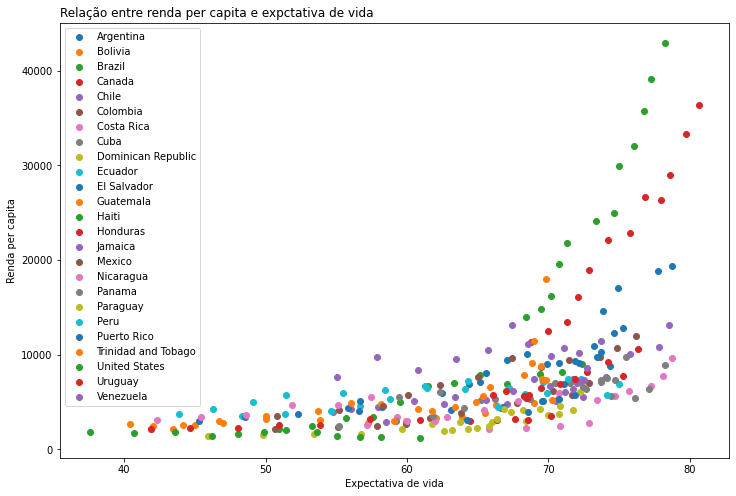

In [ ]:
americas = filtrar_continente('Americas')
paises = americas['country'].unique() #pego uma vez o nome de cada país da América
plt.figure(figsize = (12, 8))

for pais in paises: #faz o gráfico pais por pais
#eixo x = lifeExp, eixo y = gdpPercap 
  plt.scatter(filtrar_pais(pais = pais, variavel = 'lifeExp'), filtrar_pais(pais = pais, variavel =  'gdpPercap'))

plt.legend(labels = paises, loc = 'best')

plt.title('Relação entre renda per capita e expctativa de vida', loc = 'left')
plt.xlabel('Expectativa de vida')
plt.ylabel('Renda per capita')

SEABORN

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style = 'darkgrid')

In [4]:
#Base de dados de restaurante

base_dados = sns.load_dataset('tips')

#verificar

base_dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
#renomeando as colunas

base_dados.rename(columns = {'total_bill' : 'Total_conta',
                             'tip' : 'Gorjeta', 
                             'sex' : 'Sexo', 
                             'smoker' : 'Fumante',
                             'day' : 'Dia',
                             'time' : 'Periodo',
                             'size' : 'Pessoas_mesa'}, inplace = True)

base_dados.head()

,Total_conta,Gorjeta,Sexo,Fumante,Dia,Periodo,Pessoas_mesa
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Gráfico relplot

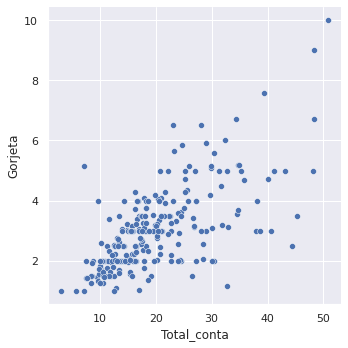

In [10]:
sns.relplot(x = 'Total_conta', y = 'Gorjeta', data = base_dados)

#quanto maior o valor da conta, maior a gorjeta

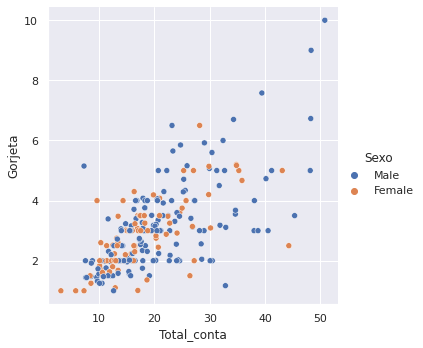

In [12]:
sns.relplot(x = 'Total_conta', y = 'Gorjeta', data = base_dados, hue = 'Sexo')

#comando hue me deixa colocar uma legenda

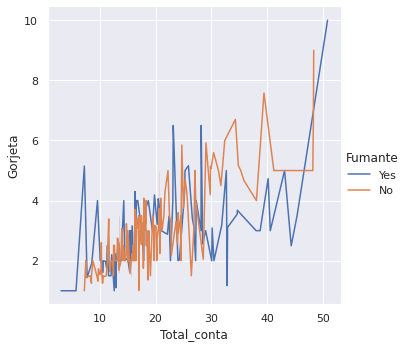

In [14]:
sns.relplot(x = 'Total_conta', y = 'Gorjeta', data = base_dados, 
            kind = 'line', hue = 'Fumante')

#posso mudar o tipo do gráfico, nesse caso para linha

Gráfico Histplot

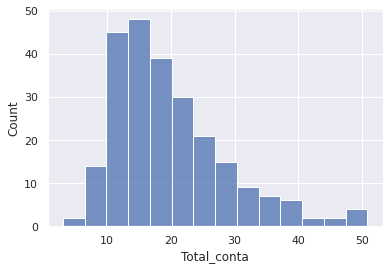

In [16]:
sns.histplot(data = base_dados, x = 'Total_conta')

#agrupa em intervalos o eixo x e faz a frequência

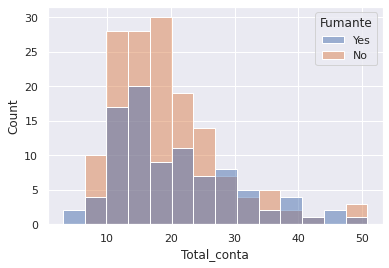

In [17]:
sns.histplot(data = base_dados, x = 'Total_conta', hue = 'Fumante')

#a mesma ideia da legenda aqui

Barplot

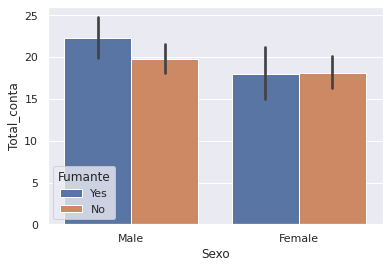

In [18]:
sns.barplot(data = base_dados, x = 'Sexo', y = 'Total_conta', hue = 'Fumante') 

#qual sexo gasta mais e se são fumantes

Pairplot

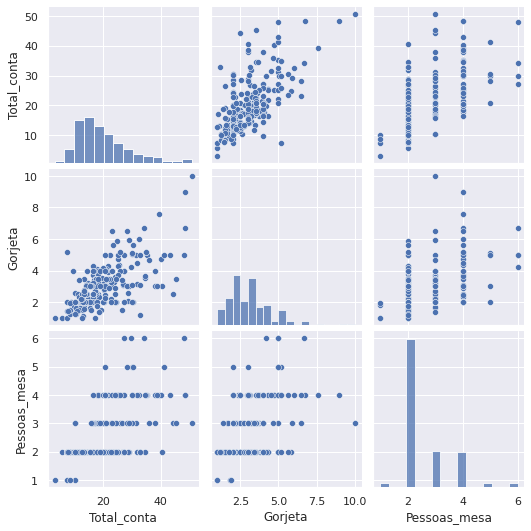

In [19]:
sns.pairplot(base_dados)

#pega cada coluna e plota ela com todas as demais

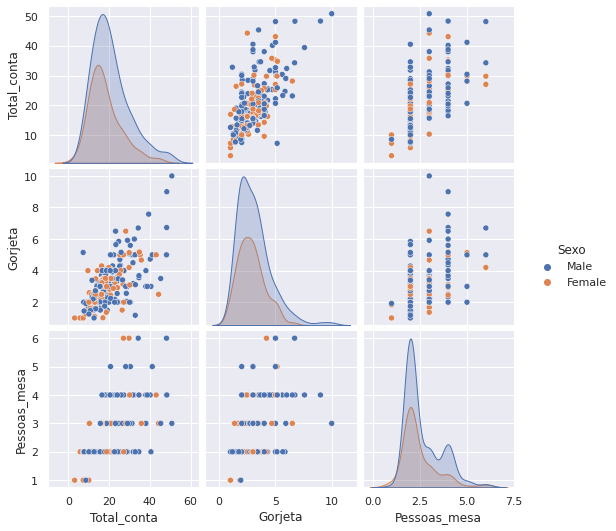

In [20]:
sns.pairplot(base_dados, hue = 'Sexo')

#também é possível colocar uma separação

Boxplot

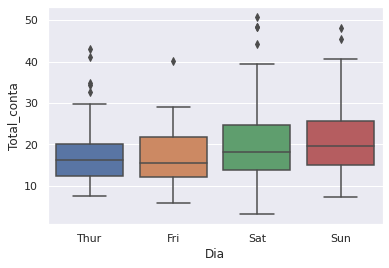

In [21]:
sns.boxplot(data = base_dados, x = 'Dia', y = 'Total_conta')

#podemos ver que sábado é o dia que gasta mais e com maior outlier

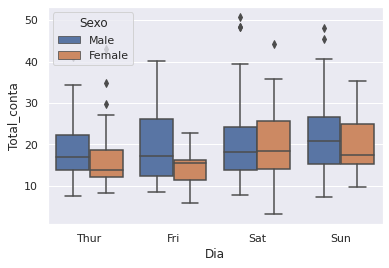

In [22]:
sns.boxplot(data = base_dados, x = 'Dia', y = 'Total_conta', hue = 'Sexo')

#no sábado que é o dia que gasta mais, as mulheres que pagaram mais as contas